# step 8

## Threshold Tuning

In [14]:
import pandas as pd
import numpy as np  


In [15]:
import joblib

artifacts = joblib.load(
    "/home/jedi/Desktop/credit risk scoring/Credit_Risk_Scoring/data/modeling_artifacts.pkl"
)

X_train = artifacts["X_train"]
X_test = artifacts["X_test"]
y_train = artifacts["y_train"]
y_test = artifacts["y_test"]

logreg_model = artifacts["logreg_model"]
rf_model = artifacts["rf_model"]
smote_model = artifacts["smote_model"]

y_pred = artifacts["y_pred_logreg"]
y_prob = artifacts["y_prob_logreg"]

y_pred_rf = artifacts["y_pred_rf"]
y_prob_rf = artifacts["y_prob_rf"]

y_pred_sm = artifacts["y_pred_smote"]
y_prob_sm = artifacts["y_prob_smote"]



In [16]:
mapping = {'no': 0, 'yes': 1}
y_test = y_test.map(mapping)

۱. TAKE probability

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.2, 0.3, 0.4, 0.5]

for t in thresholds:
    y_pred_thr = (y_prob >= t).astype(int)

    print(f"\n Threshold = {t} ")
    print("Precision:", precision_score(y_test, y_pred_thr))
    print("Recall:", recall_score(y_test, y_pred_thr))
    print("F1:", f1_score(y_test, y_pred_thr))



 Threshold = 0.2 
Precision: 0.5987697715289982
Recall: 0.94038089980679
F1: 0.7316654139375067

 Threshold = 0.3 
Precision: 0.685135414513128
Recall: 0.9147115650013801
F1: 0.783451536643026

 Threshold = 0.4 
Precision: 0.7495979784056972
Recall: 0.9006348330113166
F1: 0.8182046138415245

 Threshold = 0.5 
Precision: 0.7936868686868687
Recall: 0.8675131106817554
F1: 0.828959514703943


In [19]:
import pandas as pd

results = []

for t in thresholds:
    y_pred_thr = (y_prob >= t).astype(int)
    results.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_thr),
        "recall": recall_score(y_test, y_pred_thr),
        "f1": f1_score(y_test, y_pred_thr)
    })

df_thresholds = pd.DataFrame(results)
df_thresholds


,threshold,precision,recall,f1
0,0.2,0.598770,0.940381,0.731665
1,0.3,0.685135,0.914712,0.783452
2,0.4,0.749598,0.900635,0.818205
3,0.5,0.793687,0.867513,0.828960


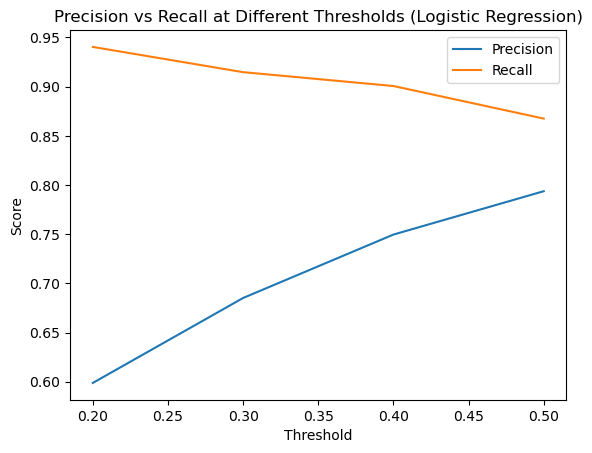

In [20]:
import matplotlib.pyplot as plt

precisions = []
recalls = []

for t in thresholds:
    y_pred_thr = (y_prob >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_thr))
    recalls.append(recall_score(y_test, y_pred_thr))

plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall at Different Thresholds (Logistic Regression)")
plt.legend()
plt.show()


# for random forest

In [21]:
for t in thresholds:
    y_pred_thr_rf = (y_prob_rf >= t).astype(int)
    print(f"RF - Threshold {t} | Recall:", recall_score(y_test, y_pred_thr_rf))


RF - Threshold 0.2 | Recall: 0.9020149047750483
RF - Threshold 0.3 | Recall: 0.8915263593706872
RF - Threshold 0.4 | Recall: 0.884073971846536
RF - Threshold 0.5 | Recall: 0.863924924096053


# SMOTE + Logistic

In [22]:
for t in thresholds:
    y_pred_thr_sm = (y_prob_sm >= t).astype(int)
    print(f"SMOTE - Threshold {t} | Recall:", recall_score(y_test, y_pred_thr_sm))


SMOTE - Threshold 0.2 | Recall: 0.9384487993375655
SMOTE - Threshold 0.3 | Recall: 0.9149875793541264
SMOTE - Threshold 0.4 | Recall: 0.9006348330113166
SMOTE - Threshold 0.5 | Recall: 0.8697212255037262
